# 1. **Preface**

[Düğün](https://dugun.com/) şirketi tarafından talep edilen bu kod mücadelesi. Buradaki aday __"Ali Saadat"__, yalnızca takip kodlarını geliştirdiğini ve topladığını onaylar. Görev, adayın aşağıdaki görevleri tamamlamasını gerektirir:

This code challenge requested by [Düğün](https://dugun.com/) company. The candidate hereby __"Ali Saadat"__ confirms that he solely developed and gathered followings codes. The task requires the candidate to complete the following tasks:


* Beyaz arka plan üzerine el yazısı ile yazilan rakamı ne oldugu tahmin edilecek.

* Bonus: Karelli-cizgili arka plan ile aynı işlem yapılacak.

Görevleri başarmak için meseleye böl ve yaklaşma yöntemiyle yaklaşıyorum. İlk önce, MNIST veri setini tanıyalım. Bu sayfadan elde edilebilen MNIST el yazısı rakamları veri tabanı, 60.000 örnek eğitim setine ve 10.000 örnek test setine sahiptir. MNIST'ten alınabilecek daha büyük bir setin alt kümesidir. Rakamlar boyut normalleştirildi ve sabit boyutlu bir görüntüde ortalandı.

in order to achieve the tasks, I approach the issue with divide and conquer methodology. First, let get familiar with the MNIST data set. The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from MNIST. The digits have been size-normalized and centered in a fixed-size image.

<img src="https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/02/Plot-of-a-Subset-of-Images-from-the-MNIST-Dataset.png"></img>

Ön işleme ve biçimlendirme konusunda asgari çaba harcayarak gerçek dünyadaki veriler üzerinde öğrenme tekniklerini ve örüntü tanıma yöntemlerini denemek isteyen insanlar için iyi bir veritabanıdır.

It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting.


ilk önce sorunun basit versiyonuna değinilecek, daha sonra gürültülü veri olan daha zorlu bölüme devam edeceğim. Aşağıdaki gibi, MNIST veri setinin gürültülü veri varyantlarından bazılarını görüntüleyebilirsiniz.

at first the simple version of the problem will be addressed, next, I will continue to the more challenging part which is noisy data. As following you can view some of the noisy data variants of the MNIST data set. 


mnist-back-image: a patch from a black and white image was used as the background for the digit image. The patches were extracted randomly from a set of 20 images downloaded from the internet. Patches which had low pixel variance (i.e. contained little texture) were ignored;

<img src="https://sites.google.com/a/lisa.iro.umontreal.ca/public_static_twiki/_/rsrc/1392048832517/variations-on-the-mnist-digits/mnist_back_image.png" ></img>

mnist-back-rand: a random background was inserted in the digit image. Each pixel value of the background was generated uniformly between 0 and 255;

<img src="https://sites.google.com/a/lisa.iro.umontreal.ca/public_static_twiki/_/rsrc/1392048835888/variations-on-the-mnist-digits/mnist_back_random.png"></img>

mnist-rot-back-image: the perturbations used in mnist-rot and mnist-back-image were combined.
<img src= "https://sites.google.com/a/lisa.iro.umontreal.ca/public_static_twiki/_/rsrc/1392048838794/variations-on-the-mnist-digits/mnist_rot_back_image.png"></img>

the work flow will be as follow:

Simple MNIST data set
* library input
* data gatherig
* data visualization
* data exploration
* data tranformation
* data loading
* model building
* model copiling
* model evaluation


Noisy MNIST data set
* library input
* data gatherig
* data visualization
* data exploration
* data tranformation
* data loading
* model building
* model copiling
* model evaluation

İletişim detayları: Ali.saadat81@gmail.com

In [1]:
# import libraries
import tensorflow as tf
import torch
from tensorflow import keras

In [2]:
# import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from PIL import Image
%matplotlib inline

# 2. **Data pre-processing**
## 2.1 Load data

   * *train*:  
this is the data used to train the CNN.  
the image data and their corresponding class is provided.   
the CNN learns the weights to create the mapping from the image data to their corresponding class.  


   * *test*:  
this is the data used to test the CNN.  
only the image data is provided.  
the prediction is submitted to the competition and depending on the accuracy, a score is obtained.

In [3]:
#Loading data from Internet
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
# check data shape
np.shape(x_train)

(60000, 28, 28)

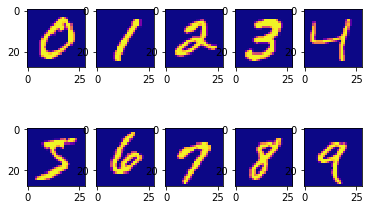

In [5]:
# Data Visualization
fig, ax = plt.subplots(2,5)
for i, ax in enumerate(ax.flatten()):
    im_idx = np.argwhere(y_train == i)[0]
    plottable_image = np.reshape(x_train[im_idx], (28, 28))
    ax.imshow(plottable_image, cmap='plasma')

## 3 Data pre processing

In [6]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


## 4. Define model architecture

You can read about the theory of CNNs on the Internet from people more knowledgeable than me and who surely explain it much better. So I will skip the theory explanation for the Conv2D, MaxPool2D, Flatten and Dense layers and I will focus on smaller details.

   * Conv2D
   
      * __filters__: usually on the first convolutional layers there are less filters, and more deeper down the CNN. Usually a power of 2 is set, and in this case 16 offered poorer performance and I didn't want to make a big CNN with 64 or 128 filters for digit classification.
      
      * __kernel_size__: this is the filter size, usually (3,3) or (5,5) is set. I advise setting one, building the architecture and changing it to see if it affects the performance though it usually doesn't.
      
      * __padding__: two options
      
         * valid padding: no padding, the image shrinks after convolution: n - f + 1
         * same padding: padding of 2, the image doesn't shrink after convolution: p = (f-1)/2 &rarr; (n+2) - f(=3) + 1 = n
         
      * __activation__: ReLU is represented mathematically by max(0,X) and offers good performance in CNNs (source: the Internet)

   * MaxPool2D: the goal is to reduce variance/overfitting and reduce computational complexity since it makes the image smaller. two pooling options
   
      * MaxPool2D: extracts the most important features like edges
      * AvgPool2D: extracts smooth features
      
      My personal conclusion then is that for binarized images, with noticeable edge differences, MaxPool performs better.
      
      
   * Dropout: you can read the theory on the Internet, it's a useful tool to reduce overfitting. The net becomes less sensitive to the specific weights of neurons and is more capable of better generalization and less likely to overfit to the train data. The optimal dropout value in Conv layers is 0.2, and if you want to implement it in the dense layers, its optimal value is 0.5: [Dropout in ML](https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5)

In [7]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.20))
model.add(Dense(16, activation=tf.nn.relu))
model.add(Dense(10,activation=tf.nn.softmax))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


## 5. Compile the model

   * **Optimizer**: it represents the gradient descent algorithm, whose goal is to minimize the cost function to approach the minimum point. **Adam** optimizer is one of the best-performing algorithms: [Adam: A Method for Stochastic Optimization](https://arxiv.org/abs/1412.6980v8). The default learning rate for the Adam optimizer is 0.001. Another optimizer choice may be RMSprop or SGD.

   * **Loss function**: It is a measure of the overall loss in the network after assigning values to the parameters during the forward phase so it indicates how well the parameters were chosen during the forward propagation phase. This loss function requires the labels to be encoded as one-hot vectors which is why this step was taken back in 1.8. 

   * **Metrics**: this refers to which metric the network should achieve, the most common one being 'accuracy' but there are other metrics to measure the performance other than accuracy, such as precision or recall or F1 score. The choice depends on the problem itself. Where high recall means low number of false negatives , High precision means low number of false positives and F1 score is a trade off between them: [Precision-Recall](http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html). Depending on the problem, accuracy may not be the best metric. Suppose a binary classification problem where there are much more 0 values than 1, and therefore it's crucial that the predicted 1's are mostly correct. A network that just outputs 0 every time would get very high accuracy but the model still wouldn't perform well. Take the popular example:
   
   > A ML company has built a tool to identify terrorists among the population and they claim to have 99.99% accuracy. When inspecting their product, turns out they just output 0 in every case. Since there is only one terrorist for every 10000 people (this is made up, I actually have no idea what the probability is but all I know is that it's very low), the company has a very high precision, but there's no need of a ML tool for that. With the class imbalance being so high, accuracy is not a good metric anymore and other options should be considered.

In [8]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 64s 1ms/sample - loss: 0.2540 - acc: 0.9229
Epoch 2/10
60000/60000 [==============================] - 54s 904us/sample - loss: 0.0951 - acc: 0.9715
Epoch 3/10
60000/60000 [==============================] - 50s 838us/sample - loss: 0.0676 - acc: 0.9792
Epoch 4/10
60000/60000 [==============================] - 48s 793us/sample - loss: 0.0518 - acc: 0.9837
Epoch 5/10
60000/60000 [==============================] - 50s 835us/sample - loss: 0.0438 - acc: 0.9858
Epoch 6/10
60000/60000 [==============================] - 59s 992us/sample - loss: 0.0364 - acc: 0.9882
Epoch 7/10
60000/60000 [==============================] - 57s 958us/sample - loss: 0.0305 - acc: 0.9903
Epoch 8/10
60000/60000 [==============================] - 55s 918us/sample - loss: 0.0253 - acc: 0.9915
Epoch 9/10
60000/60000 [==============================] - 54s 894us/sample - loss: 0.0252 - acc: 0.9913
Epoch 10/10
60000/60000 [==================

In [9]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 5s 518us/sample - loss: 0.0672 - acc: 0.9849s -  - ETA: 1s - loss: 


[0.06723486893434279, 0.9849]

# Noisy MNIST

In [10]:
# import libraries
from io import StringIO,BytesIO

In [11]:
##Loading data from Internet
#Unziping data to lacal disk
import requests, zipfile
r = requests.get("http://www.iro.umontreal.ca/~lisa/icml2007data/mnist_background_random.zip", stream=True)
z = zipfile.ZipFile(BytesIO(r.content))
z.extractall()

In [12]:
import numpy as np
#Assignig datas to variables
b_data = np.loadtxt('mnist_background_random_test.amat')
a_data = np.loadtxt('mnist_background_random_train.amat')

In [13]:
# get train image datas
ax_train = a_data[:, :-1] / 1.0

# get train image labels
ay_train = a_data[:, -1:]

In [14]:
# get test image datas
bx_test = b_data[:, :-1] / 1.0

# get test image labels
by_test = b_data[:, -1:]

In [15]:
ax_train = ax_train.reshape(-1,28, 28)
bx_test = bx_test.reshape(-1,28, 28)

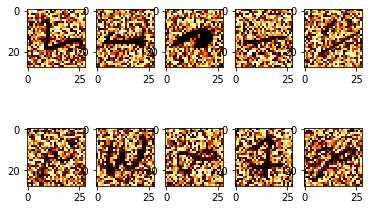

In [16]:
# Data Visualization
fig, ax = plt.subplots(2,5)
for i, ax in enumerate(ax.flatten()):
    im_idx = np.argwhere(y_train == i)[0]
    plottable_image = np.reshape(ax_train[im_idx], (28, 28))
    ax.imshow(plottable_image, cmap='afmhot_r')

In [17]:
# Reshaping the array to 4-dims so that it can work with the Keras API
ax_train = ax_train.reshape(ax_train.shape[0], 28, 28, 1)
bx_test = bx_test.reshape(bx_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
ax_train = ax_train.astype('float32')
bx_test = bx_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
ax_train /= 255
bx_test /= 255
print('x_train shape:', ax_train.shape)
print('Number of images in ax_train', ax_train.shape[0])
print('Number of images in bx_test', bx_test.shape[0])

x_train shape: (12000, 28, 28, 1)
Number of images in ax_train 12000
Number of images in bx_test 50000


In [18]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.20))
model.add(Dense(32, activation=tf.nn.relu))
model.add(Dense(64, activation=tf.nn.relu))
model.add(Dense(32, activation=tf.nn.relu))
model.add(Dropout(0.20))
model.add(Dense(10,activation=tf.nn.softmax))

In [19]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=ax_train,y=ay_train, epochs=15)

Train on 12000 samples
Epoch 1/15
12000/12000 [==============================] - 12s 1ms/sample - loss: 2.3030 - acc: 0.1097
Epoch 2/15
12000/12000 [==============================] - 12s 1ms/sample - loss: 2.3022 - acc: 0.1072
Epoch 3/15
12000/12000 [==============================] - 12s 1ms/sample - loss: 2.3023 - acc: 0.1083
Epoch 4/15
12000/12000 [==============================] - 12s 1ms/sample - loss: 2.1296 - acc: 0.1936
Epoch 5/15
12000/12000 [==============================] - 12s 1ms/sample - loss: 1.3551 - acc: 0.5098
Epoch 6/15
12000/12000 [==============================] - 13s 1ms/sample - loss: 0.9137 - acc: 0.6946
Epoch 7/15
12000/12000 [==============================] - 12s 1ms/sample - loss: 0.7124 - acc: 0.7718
Epoch 8/15
12000/12000 [==============================] - 12s 1ms/sample - loss: 0.6101 - acc: 0.8119
Epoch 9/15
12000/12000 [==============================] - 12s 1ms/sample - loss: 0.5333 - acc: 0.8363
Epoch 10/15
12000/12000 [==============================] - 

In [20]:
model.evaluate(bx_test, by_test)

50000/50000 [==============================] - 28s 569us/sample - loss: 0.3837 - acc: 0.8863


[0.38366836894869805, 0.88626]

# Zaman ayırdığınız için şimdiden teşekkür ederiz. Herhangi bir yardımda bulunabilirsem, haberim olsun.


# Thank you in advance for your time. If I can be of any assistance, let me know.

# saygılarımla
Ali Saadat